In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl
import ipywidgets as wi 

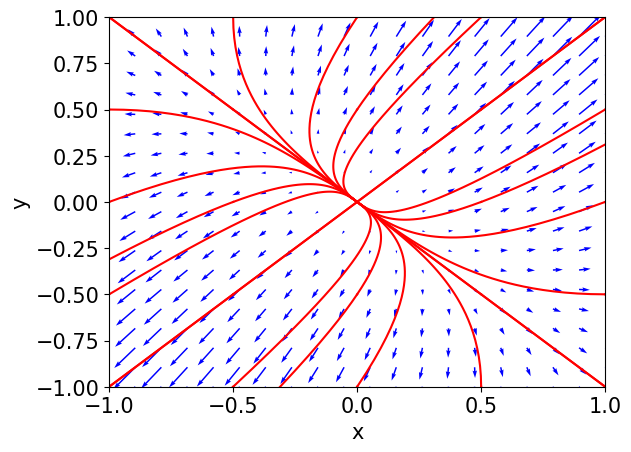

In [2]:
# The 2-dimensional linear system.
a, b, c, d = 2, 1, 1, 2
def dx_dt(x, t):
    return [a*x[0] + b*x[1], c*x[0] + d*x[1]]
# Trajectories in forward time.
ts = np.linspace(0, 4, 100)
ic = np.linspace(-1, 1, 5)
for r in ic:
    for s in ic:
        x0 = [r, s]
        xs = odeint(dx_dt, x0, ts)
        plt.plot(xs[:,0], xs[:,1], "r-")
# Trajectories in backward time.
ts = np.linspace(0, -4, 100)
ic = np.linspace(-1, 1, 5)
for r in ic:
    for s in ic:
        x0 = [r, s]
        xs = odeint(dx_dt, x0, ts)
        plt.plot(xs[:,0], xs[:,1], "r-")
# Label the axes and set fontsizes.
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
# Plot the vectorfield.
X,Y = np.mgrid[-1:1:20j, -1:1:20j]
u = a*X + b*Y
v = c*X + d*Y
pl.quiver(X, Y, u, v, color = "b")
plt.show()

In [3]:
def RungeKuttaGen(a,b,n,F,y0,alp,A1,A2,p):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        K1 = F(t[i], y[:,i], p)
        K2 = F(t[i]+alp*h, y[:,i]+alp*h*K1, p)
        y[:,i+1] = y[:,i] + h*(A1*K1+A2*K2)

    return (t, y)

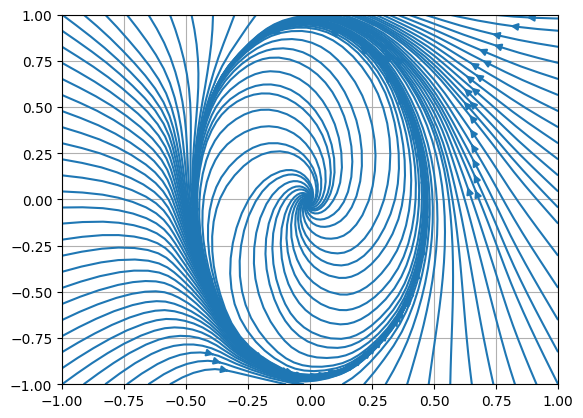

In [ ]:
def prueba(t, Y):
    x, y = Y
    return np.array([-1/2*y*(1+x)+x*(1-4*x**2-y**2), 2*x*(1+x)+y*(1-4*x**2-y**2)])

Y, X = np.mgrid[-1:1:10j, -1:1:10j]
U, V = prueba(0, [X, Y])

plt.streamplot(X, Y, U, V, density = 0.8, broken_streamlines=False)
plt.grid()
plt.show()

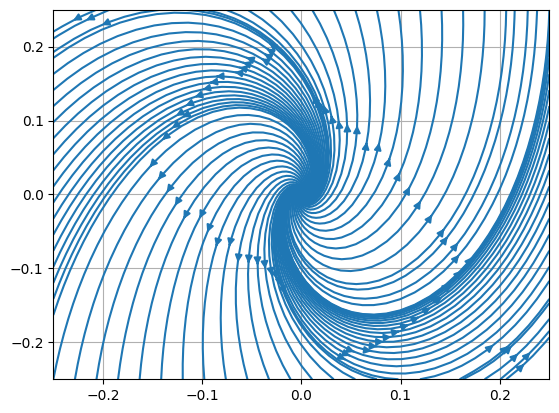

In [13]:
Y, X = np.mgrid[-0.25:0.25:10j, -0.25:0.25:10j]
U, V = prueba(0, [X, Y])

plt.streamplot(X, Y, U, V, density = 0.8, broken_streamlines=False)
plt.grid()
plt.show()